In [4]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image

data = pd.read_csv('spam.csv', encoding='latin-1', sep='\t', quoting=csv.QUOTE_NONE,
                           names=["label", "message"])
print(data)

                                                  label  message
0                                              v1,v2,,,      NaN
1     ham,"Go until jurong point, crazy.. Available ...      NaN
2                  ham,Ok lar... Joking wif u oni...,,,      NaN
3     spam,Free entry in 2 a wkly comp to win FA Cup...      NaN
4     ham,U dun say so early hor... U c already then...      NaN
5     ham,"Nah I don't think he goes to usf, he live...      NaN
6     spam,"FreeMsg Hey there darling it's been 3 we...      NaN
7     ham,Even my brother is not like to speak with ...      NaN
8     ham,As per your request 'Melle Melle (Oru Minn...      NaN
9     spam,WINNER!! As a valued network customer you...      NaN
10    spam,Had your mobile 11 months or more? U R en...      NaN
11    ham,"I'm gonna be home soon and i don't want t...      NaN
12    spam,"SIX chances to win CASH! From 100 to 20,...      NaN
13    spam,"URGENT! You have won a 1 week FREE membe...      NaN
14    ham,I've been searc

In [44]:
messages = [line.rstrip() for line in open('spam.csv', encoding='latin-1')]
print (len(messages))

5575


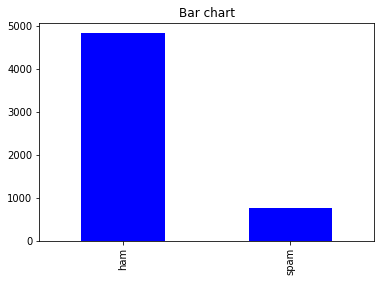

In [5]:
import pandas as pd
data = pd.read_csv('spam.csv', encoding='latin-1')

count=pd.value_counts(data["v1"], sort= True)
count.plot(kind= 'bar', color= ["blue", "blue"])
plt.title('Bar chart')
plt.show()

In [64]:
#We want to find the frequencies of words in the spam and non-spam messages.
#The words of the messages will be model features.

#We use the function Counter.
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})
df1

,words in non-spam,count
0,to,1530
1,you,1458
2,I,1436
3,the,1019
4,a,969
5,and,738
6,i,736
7,in,734
8,u,645
9,is,638


In [65]:
df2

,words in spam,count_
0,to,604
1,a,358
2,your,187
3,call,185
4,or,185
5,the,178
6,2,169
7,for,169
8,you,164
9,is,143


In [78]:
#Text preprocessing, tokenizing and filtering of stopwords are included in a high level component that is able to build a dictionary of features and transform documents to feature vectors.

#We remove the stop words in order to improve the analytics
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
np.shape(X)

(5572, 8404)

In [103]:
#splitting into train set and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8404), (1839, 8404)]


In [92]:
list_alpha = np.arange(1,10000)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))

precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [93]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test,precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy',  'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Precision
0,1.0,0.995982,0.976074,0.906250
1,2.0,0.994107,0.981512,0.946721
2,3.0,0.992767,0.981512,0.961864
3,4.0,0.991428,0.980424,0.973684
4,5.0,0.990088,0.978793,0.986301
5,6.0,0.987677,0.976074,0.990566
6,7.0,0.986338,0.974443,0.995169
7,8.0,0.985802,0.973899,0.995146
8,9.0,0.983927,0.972811,0.995098
9,10.0,0.982856,0.972268,0.995074


In [94]:
models[models['Test Precision']==1].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Precision
15,16.0,0.979373,0.969549,1.0
16,17.0,0.978570,0.967917,1.0
17,18.0,0.978034,0.967374,1.0
18,19.0,0.977498,0.966830,1.0
19,20.0,0.975087,0.966286,1.0


In [95]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             16.000000
Train Accuracy     0.979373
Test Accuracy      0.969549
Test Precision     1.000000
Name: 15, dtype: float64

In [96]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,56,196


In [99]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

In [100]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy',  'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Precision
0,500.0,0.994910,0.982599,1.0
1,600.0,0.995982,0.982599,1.0
2,700.0,0.996785,0.982599,1.0
3,800.0,0.997053,0.983143,1.0
4,900.0,0.997589,0.983143,1.0
5,1000.0,0.998125,0.983143,1.0
6,1100.0,0.998928,0.983143,1.0
7,1200.0,0.999732,0.983143,1.0
8,1300.0,1.000000,0.983143,1.0
9,1400.0,1.000000,0.983143,1.0


In [89]:
models[models['Test Precision']==1].head(n=5)

,C,Train Accuracy,Test Accuracy,Test Precision
0,500.0,0.994910,0.982599,1.0
1,600.0,0.995982,0.982599,1.0
2,700.0,0.996785,0.982599,1.0
3,800.0,0.997053,0.983143,1.0
4,900.0,0.997589,0.983143,1.0


In [90]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                 800.000000
Train Accuracy      0.997053
Test Accuracy       0.983143
Test Precision      1.000000
Name: 3, dtype: float64

In [91]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])


,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,31,221
